<a href="https://colab.research.google.com/github/SandeepChatterjee66/NLP-Workshop24/blob/main/notebook-1-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Create Tensors
# PyTorch tensors are similar to NumPy arrays, but they can also run on a GPU if available
x = torch.tensor([1.0, 2.0, 3.0])  # 1D tensor (vector)
y = torch.tensor([4.0, 5.0, 6.0])  # 1D tensor (vector)

print(f"x: {x}")
print(f"y: {y}")

# 2. Tensor Operations
# Perform basic arithmetic operations on tensors
z = x + y
print(f"z (x + y): {z}")

z = x * y
print(f"z (x * y): {z}")

# 3. Define a Simple Neural Network Model (MLP)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 5)  # First linear layer (input size 3 -> output size 5)
        self.fc2 = nn.Linear(5, 1)  # Second linear layer (input size 5 -> output size 1)
        self.relu = nn.ReLU()       # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU activation after the first layer
        x = self.fc2(x)             # Output layer
        return x

# 4. Instantiate the Model
model = SimpleNN()

# 5. Define Loss Function and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer

# 6. Dummy Input and Target Data
# In this example, we're just using random data for the sake of demonstration
input_data = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])  # 3 samples, each with 3 features
target_data = torch.tensor([[10.0], [20.0], [30.0]])  # Corresponding targets

# 7. Training Loop (for 100 epochs)
epochs = 100
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the gradients before backpropagation

    # Forward Pass
    outputs = model(input_data)

    # Calculate Loss
    loss = criterion(outputs, target_data)

    # Backward Pass
    loss.backward()

    # Update Parameters
    optimizer.step()

    # Print Loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# 8. Making Predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No need to calculate gradients during inference
    predictions = model(input_data)
    print("\nPredictions:")
    print(predictions)

x: tensor([1., 2., 3.])
y: tensor([4., 5., 6.])
z (x + y): tensor([5., 7., 9.])
z (x * y): tensor([ 4., 10., 18.])
Epoch [10/100], Loss: 419.4490
Epoch [20/100], Loss: 302.1870
Epoch [30/100], Loss: 223.9019
Epoch [40/100], Loss: 171.6382
Epoch [50/100], Loss: 136.7465
Epoch [60/100], Loss: 113.4525
Epoch [70/100], Loss: 97.9013
Epoch [80/100], Loss: 87.5191
Epoch [90/100], Loss: 80.5880
Epoch [100/100], Loss: 75.9606

Predictions:
tensor([[17.0124],
        [17.0124],
        [17.0124]])


Using device: cuda
Epoch [1/20], Loss: 0.6923
Epoch [2/20], Loss: 0.6748
Epoch [3/20], Loss: 0.6525
Epoch [4/20], Loss: 0.6057
Epoch [5/20], Loss: 0.5642
Epoch [6/20], Loss: 0.4905
Epoch [7/20], Loss: 0.4406
Epoch [8/20], Loss: 0.4041
Epoch [9/20], Loss: 0.3401
Epoch [10/20], Loss: 0.3073
Epoch [11/20], Loss: 0.2685
Epoch [12/20], Loss: 0.2555
Epoch [13/20], Loss: 0.2242
Epoch [14/20], Loss: 0.2429
Epoch [15/20], Loss: 0.2314
Epoch [16/20], Loss: 0.2098
Epoch [17/20], Loss: 0.1805
Epoch [18/20], Loss: 0.1707
Epoch [19/20], Loss: 0.1653
Epoch [20/20], Loss: 0.1516


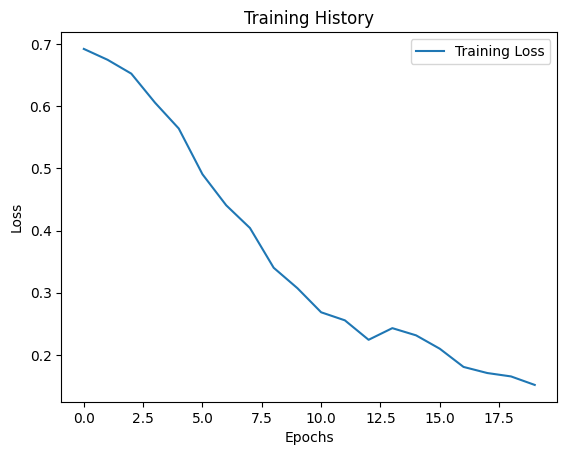

Test predictions (logits): tensor([[  3.5113],
        [-11.0612],
        [  2.0694],
        [  4.5013],
        [  5.3026]], device='cuda:0')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU()
        )
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        return x

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, epochs):
    history = {'loss': []}
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        history['loss'].append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return history

# Function to plot the training history
def plot_training_history(history):
    plt.plot(history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training History')
    plt.legend()
    plt.show()

# Test the model on sample examples
def test_model(model, test_examples):
    model.eval()
    with torch.no_grad():
        predictions = model(test_examples.to(device))
    return predictions

# Main function
if __name__ == "__main__":
    # Check for GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Generate some synthetic data for a simple NLP task (like binary classification)
    torch.manual_seed(42)
    input_size = 20  # Number of features (like an embedding size)
    hidden_size = 32  # Number of hidden neurons
    output_size = 1  # Binary classification (0 or 1)

    # Generate synthetic dataset
    X = torch.rand(1000, input_size)
    y = (X.sum(dim=1) > 10).float().view(-1, 1)  # Binary labels based on a simple rule

    # Split into train and test sets
    train_size = int(0.8 * len(X))
    test_size = len(X) - train_size
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create DataLoader for batch training
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)

    # Initialize model, loss, and optimizer
    model = MLPModel(input_size, hidden_size, output_size).to(device)
    criterion = nn.BCEWithLogitsLoss()  # For binary classification
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Train the model
    epochs = 20
    history = train_model(model, train_loader, criterion, optimizer, epochs)

    # Plot the training history
    plot_training_history(history)

    # Test the model on some sample data
    sample_test_examples = torch.rand(5, input_size)  # Generate 5 random test examples
    predictions = test_model(model, sample_test_examples)
    print("Test predictions (logits):", predictions)

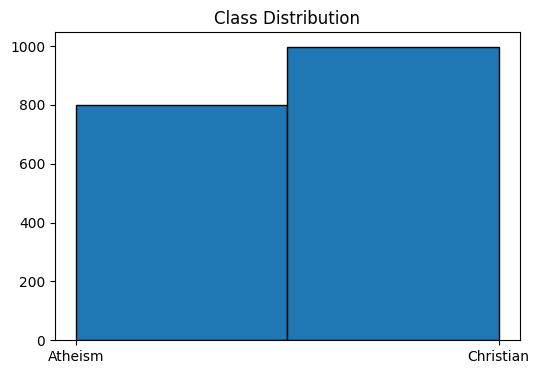

Epoch [1/100], Train Loss: 0.6107, Val Loss: 0.4760
Epoch [2/100], Train Loss: 0.3798, Val Loss: 0.3982
Epoch [3/100], Train Loss: 0.2340, Val Loss: 0.4206
Epoch [4/100], Train Loss: 0.1518, Val Loss: 0.4963
Epoch [5/100], Train Loss: 0.0909, Val Loss: 0.6142
Epoch [6/100], Train Loss: 0.0560, Val Loss: 0.6790
Epoch [7/100], Train Loss: 0.0374, Val Loss: 1.0147
Epoch [8/100], Train Loss: 0.0295, Val Loss: 1.0837
Epoch [9/100], Train Loss: 0.0259, Val Loss: 1.6530
Epoch [10/100], Train Loss: 0.0246, Val Loss: 1.6832
Epoch [11/100], Train Loss: 0.0227, Val Loss: 1.7386
Epoch [12/100], Train Loss: 0.0219, Val Loss: 1.7812
Epoch [13/100], Train Loss: 0.0214, Val Loss: 2.0652
Epoch [14/100], Train Loss: 0.0212, Val Loss: 2.0861
Epoch [15/100], Train Loss: 0.0215, Val Loss: 2.1135
Epoch [16/100], Train Loss: 0.0211, Val Loss: 2.1360
Epoch [17/100], Train Loss: 0.0205, Val Loss: 2.1616
Epoch [18/100], Train Loss: 0.0211, Val Loss: 2.1798
Epoch [19/100], Train Loss: 0.0203, Val Loss: 2.4542
Ep

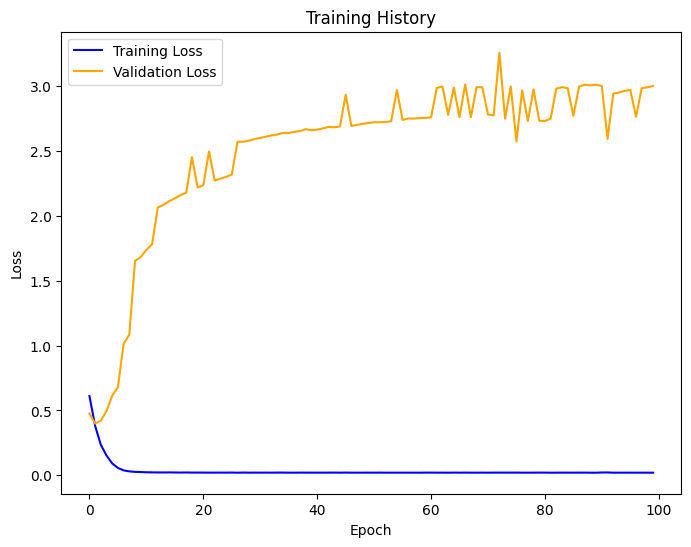

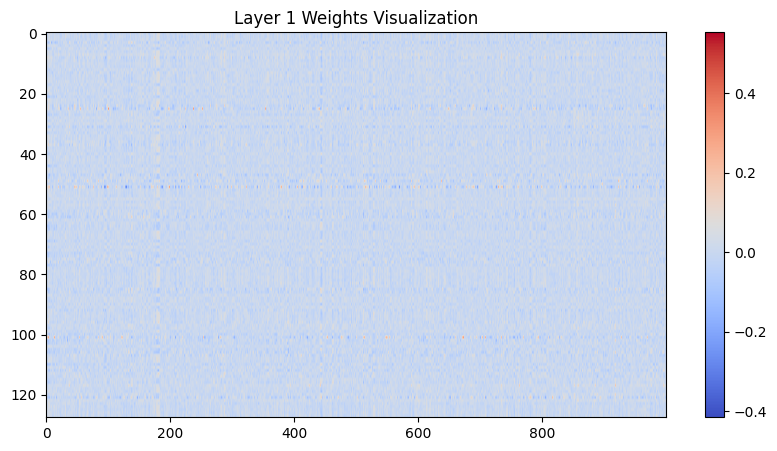

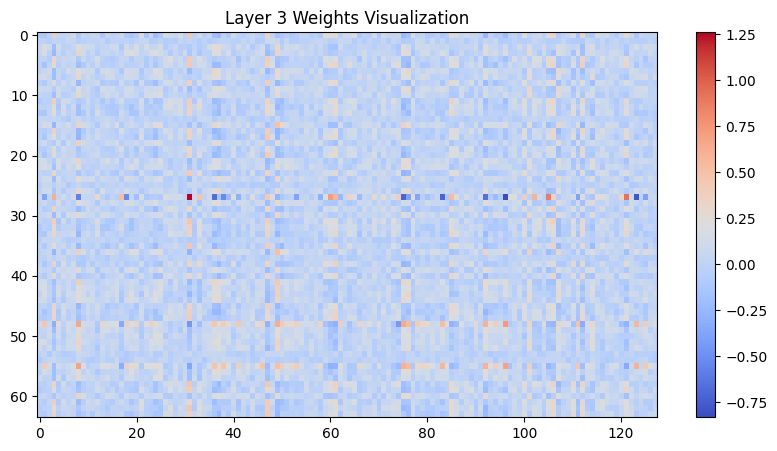

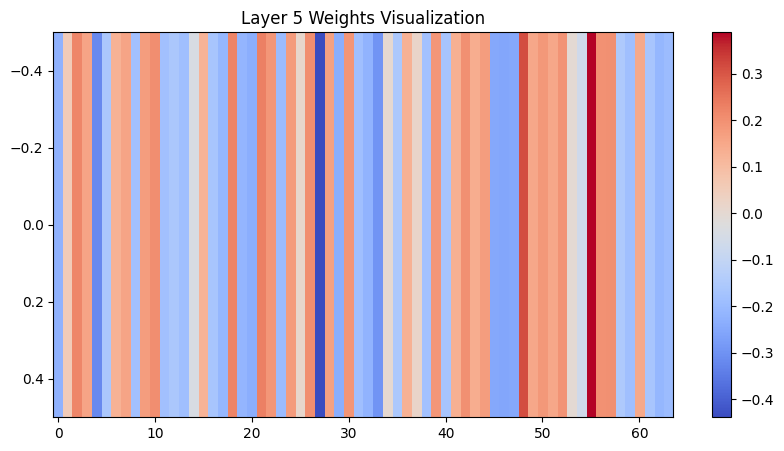

Sample: There is no god in this world. Everything is science. 
Predicted Label: Atheism (Probability: 0.0003)

Sample: Jesus Christ is the savior and the son of God. 
Predicted Label: Christian (Probability: 0.9951)

Sample: Atheism is a philosophical stance that rejects belief in deities. 
Predicted Label: Atheism (Probability: 0.0006)

Sample: Christian faith is based on the life and teachings of Jesus Christ. 
Predicted Label: Christian (Probability: 1.0000)



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# Load the 20 newsgroups dataset
categories = ['alt.atheism', 'soc.religion.christian']  # Binary classification for simplicity
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert text to feature vectors using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, binary=True)
X = vectorizer.fit_transform(data.data).toarray()
y = np.array([1 if label == 1 else 0 for label in data.target])  # Convert labels to 0 or 1 for binary classification

# Visualize class distribution
plt.figure(figsize=(6, 4))
plt.hist(y, bins=2, edgecolor='k')
plt.xticks([0, 1], ['Atheism', 'Christian'])
plt.title('Class Distribution')
plt.show()

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batch training
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

# 2. Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instantiate model
input_dim = X_train.shape[1]
model = MLP(input_dim)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training Loop
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Forward pass
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Store training loss
    train_loss = epoch_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor.to(device)).squeeze()
        val_loss = criterion(val_outputs, y_test_tensor.to(device))
        val_losses.append(val_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss.item():.4f}')

# 4. Plot Training History
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# 5. Visualize the Learned Weights
for i, layer in enumerate(model.model):
    if isinstance(layer, nn.Linear):
        weights = layer.weight.data.cpu().numpy()
        plt.figure(figsize=(10, 5))
        plt.imshow(weights, cmap='coolwarm', aspect='auto')
        plt.colorbar()
        plt.title(f'Layer {i+1} Weights Visualization')
        plt.show()

# 6. Test the model on new sample examples
test_samples = [
    "There is no god in this world. Everything is science.",
    "Jesus Christ is the savior and the son of God.",
    "Atheism is a philosophical stance that rejects belief in deities.",
    "Christian faith is based on the life and teachings of Jesus Christ."
]

test_vectors = vectorizer.transform(test_samples).toarray()
test_tensor = torch.tensor(test_vectors, dtype=torch.float32).to(device)

model.eval()
with torch.no_grad():
    predictions = model(test_tensor).squeeze().cpu().numpy()

for i, sample in enumerate(test_samples):
    prediction = 'Christian' if predictions[i] > 0.5 else 'Atheism'
    print(f'Sample: {sample} \nPredicted Label: {prediction} (Probability: {predictions[i]:.4f})\n')


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Using device: cuda
Epoch [1/10], Training Loss: 0.6938, Validation Loss: 0.6933
Epoch [2/10], Training Loss: 0.6932, Validation Loss: 0.6931
Epoch [3/10], Training Loss: 0.6932, Validation Loss: 0.6933
Epoch [4/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [5/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [6/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [7/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [9/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [10/10], Training Loss: 0.6932, Validation Loss: 0.6932


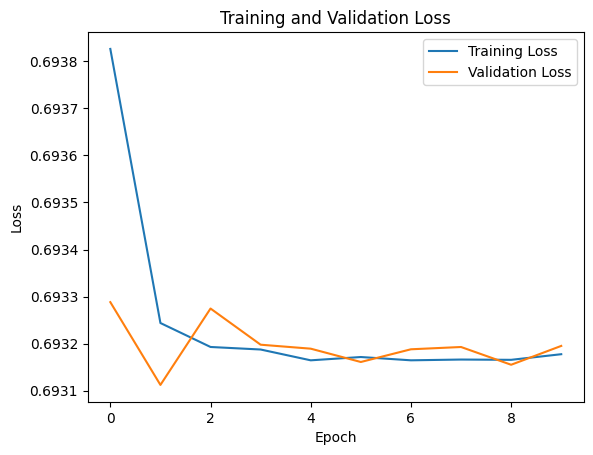

Model saved!
Review: This movie was fantastic! The plot was thrilling.
 Label: 1
 Sentiment: Positive

Review: It was a waste of time. Totally boring and predictable.
 Label: 1
 Sentiment: Positive



<ipython-input-53-2815cc568380>:120: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('sentiment_model.pth'))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from datasets import load_dataset

# 1. Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. Load and preprocess dataset
dataset = load_dataset("imdb", split='train')  # using a subset of the dataset for demonstration

# Use simple random embeddings (word embeddings initialized randomly)
embedding_dim = 100  # Size of each word embedding
vocab_size = 10000  # Max vocabulary size (limit to first 10,000 words)

# Create random word embeddings for simplicity
word_embeddings = {f"word_{i}": np.random.rand(embedding_dim) for i in range(vocab_size)}

# Preprocessing: Map each word to an embedding
def text_to_embedding(text):
    words = text.split()
    embeddings = [word_embeddings.get(word, np.random.rand(embedding_dim)) for word in words]
    return np.mean(embeddings, axis=0)  # Average word embeddings for the text

# Prepare features (text -> word embeddings) and labels (positive/negative sentiment)
X = np.array([text_to_embedding(text) for text in dataset['text']])
y = np.array(dataset['label'])

# Fix issue with converting labels to integers
y = y.astype(int)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

# Create DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# 3. Define MLP Model
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 2)  # Binary classification (positive/negative)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Instantiate model and move it to the GPU
model = MLPModel(input_dim=X_train.shape[1]).to(device)

# 4. Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Train the model and plot the loss
train_losses = []
val_losses = []
for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch [{epoch+1}/10], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

# 6. Plot the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 7. Save and load the model
torch.save(model.state_dict(), 'sentiment_model.pth')  # Save model
print("Model saved!")

# Load the model
loaded_model = MLPModel(input_dim=X_train.shape[1]).to(device)
loaded_model.load_state_dict(torch.load('sentiment_model.pth'))
loaded_model.eval()

# 8. Test on sample inputs
sample_reviews = [
    "This movie was fantastic! The plot was thrilling.",
    "It was a waste of time. Totally boring and predictable."
]

# Convert the sample reviews to embeddings
sample_reviews_embeddings = np.array([text_to_embedding(review) for review in sample_reviews])
sample_reviews_tensor = torch.tensor(sample_reviews_embeddings, dtype=torch.float32).to(device)

with torch.no_grad():
    outputs = loaded_model(sample_reviews_tensor)
    predicted_labels = torch.argmax(outputs, dim=1)
    for review, label in zip(sample_reviews, predicted_labels):
        sentiment = "Positive" if label == 1 else "Negative"
        print(f"Review: {review}\n Label: {label}\n Sentiment: {sentiment}\n")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from datasets import load_dataset
import gensim.downloader as api

# 1. Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. Download the Word2Vec model from gensim's API (small model)
def load_word2vec_model():
    # Load the pre-trained Word2Vec model (Google's 100-dimensional vectors)
    model = api.load("word2vec-google-news-100")
    print("Word2Vec model loaded successfully!")
    return model

# Load Word2Vec model
word2vec_model = load_word2vec_model()

Using device: cuda


ValueError: Incorrect model/corpus name

In [ ]:
# 3. Preprocess dataset and convert text to Word2Vec embeddings
dataset = load_dataset("imdb", split='train')
# # using a subset of the dataset for demonstration
# # Balance the dataset by taking an equal number of positive and negative reviews
# positive_reviews = [example for example in full_dataset if example['label'] == 1]
# negative_reviews = [example for example in full_dataset if example['label'] == 0]

# # Sampling equal number of positive and negative reviews
# n_samples = int(min(len(positive_reviews), len(negative_reviews))*0.1)  # Get the minimum size of positive/negative samples
# print(f'taking {n_samples} out of {len(full_dataset["label"])}')
# dataset = positive_reviews[:n_samples] + negative_reviews[:n_samples]

# # Shuffle the dataset to randomize the order
# np.random.shuffle(dataset)


In [ ]:
dataset = full_dataset

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Epoch [1/10], Training Loss: 0.5942, Validation Loss: 0.5187
Epoch [2/10], Training Loss: 0.4944, Validation Loss: 0.4844
Epoch [3/10], Training Loss: 0.4769, Validation Loss: 0.4735
Epoch [4/10], Training Loss: 0.4685, Validation Loss: 0.4686
Epoch [5/10], Training Loss: 0.4642, Validation Loss: 0.4641
Epoch [6/10], Training Loss: 0.4609, Validation Loss: 0.4615
Epoch [7/10], Training Loss: 0.4586, Validation Loss: 0.4617
Epoch [8/10], Training Loss: 0.4551, Validation Loss: 0.4598
Epoch [9/10], Training Loss: 0.4541, Validation Loss: 0.4571
Epoch [10/10], Training Loss: 0.4531, Validation Loss: 0.4563


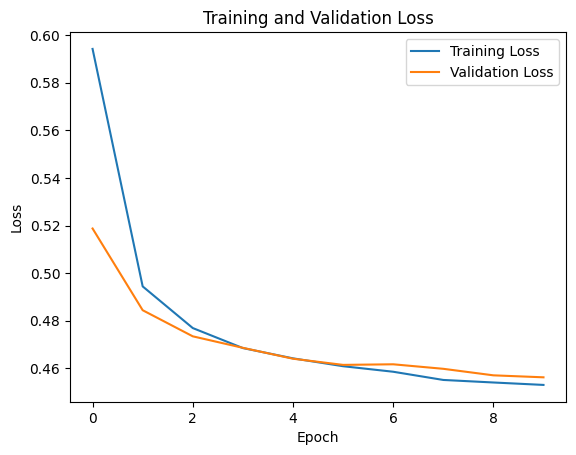

Model saved!


<ipython-input-65-4e4084473b6c>:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('sentiment_model.pth'))


MLPModel(
  (fc1): Linear(in_features=300, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def text_to_embedding(text, model):
    # Replace non-alphabetic characters with spaces
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text.lower())  # Keep only alphabets and spaces
    tokens = word_tokenize(cleaned_text)  # Tokenize the cleaned text
    embeddings = [model[word] for word in tokens if word in model]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)


# Prepare features (text -> word embeddings) and labels (positive/negative sentiment)
X = np.array([text_to_embedding(text, word2vec_model) for text in dataset['text']])
y = np.array(dataset['label'])

# Fix issue with converting labels to integers
y = y.astype(int)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

# Create DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# 4. Define MLP Model
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 2)  # Binary classification (positive/negative)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Instantiate model and move it to the GPU
model = MLPModel(input_dim=X_train.shape[1]).to(device)

# 5. Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 6. Train the model and plot the loss
train_losses = []
val_losses = []
for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch [{epoch+1}/10], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

# 7. Plot the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 8. Save and load the model
torch.save(model.state_dict(), 'sentiment_model.pth')  # Save model
print("Model saved!")

# Load the model
loaded_model = MLPModel(input_dim=X_train.shape[1]).to(device)
loaded_model.load_state_dict(torch.load('sentiment_model.pth'))
loaded_model.eval()

In [ ]:
# Instantiate model and move it to the GPU
model = MLPModel(input_dim=X_train.shape[1]).to(device)

# Display the architecture
print(model)  # This will print out the architecture of the neural network

from torchsummary import summary

# 5. Print the Model Summary
summary(model, (X_train.shape[1],))  # Show model architecture summary

MLPModel(
  (fc1): Linear(in_features=300, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          38,528
              ReLU-2                  [-1, 128]               0
            Linear-3                    [-1, 2]             258
           Softmax-4                    [-1, 2]               0
Total params: 38,786
Trainable params: 38,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


In [ ]:
# 9. Test on sample inputs
sample_reviews = [
    "They looked quite wonderful, it was thrilling",
    "It was a waste of time. Totally boring and predictable."
]

# Convert the sample reviews to embeddings
sample_reviews_embeddings = np.array([text_to_embedding(review, word2vec_model) for review in sample_reviews])
sample_reviews_tensor = torch.tensor(sample_reviews_embeddings, dtype=torch.float32).to(device)

with torch.no_grad():
    outputs = loaded_model(sample_reviews_tensor)
    predicted_labels = torch.argmax(outputs, dim=1)
    for review, label in zip(sample_reviews, predicted_labels):
        sentiment = "Positive" if label == 1 else "Negative"
        print(f"Review: {review}\nSentiment: {sentiment}\n")

Review: They looked quite wonderful, it was thrilling
Sentiment: Positive

Review: It was a waste of time. Totally boring and predictable.
Sentiment: Negative



In [ ]:
from collections import Counter
Counter(dataset['label'])

Counter({0: 12500, 1: 12500})

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 9. Evaluate the model on the test dataset
# Assuming you have a test dataset
# If not, you can split the data as test dataset or use part of the validation dataset

# Example: Using the validation set as a "test" dataset (just for demonstration)
test_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# Predictions and True Labels
predictions = []
true_labels = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
        predictions.extend(predicted.cpu().numpy())  # Move to CPU for evaluation
        true_labels.extend(labels.cpu().numpy())  # Move to CPU for evaluation

# Compute Evaluation Metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='binary')
recall = recall_score(true_labels, predictions, average='binary')
f1 = f1_score(true_labels, predictions, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(true_labels, predictions))

Accuracy: 0.4972
Precision: 0.4971
Recall: 0.9992
F1-Score: 0.6639

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.00      0.00      2515
           1       0.50      1.00      0.66      2485

    accuracy                           0.50      5000
   macro avg       0.55      0.50      0.33      5000
weighted avg       0.55      0.50      0.33      5000



In [ ]:
len(dataset["text"])

25000